# Quantile Parameterization Demo

This notebook is meant to demonstrate the use of quantile parameterization. Basic usage is covered in the first section. In the second half two different classes of distribution are used to showcase how the various PDF reconstruction algorithms perform.

In [1]:
# Imports and global defaults
import qp
import numpy as np
import matplotlib.pyplot as plt

# Sets the x axis limits on all plots, rerun notebook to apply changes.
STD_X_LIM = (0,5)

In [2]:
# Create an Ensemble with a single normal distribution
single_norm = qp.Ensemble(qp.stats.norm, data=dict(loc=3, scale=0.5))

# Starting with a simple base case. Reasonable quantiles >0, <1.0
single_norm_quantiles = np.linspace(0.001, 0.999, 16)
single_norm_locations = single_norm.ppf(single_norm_quantiles)

# Create a quantile parameterization ensemble
quant_dist_single_norm = qp.quant(quants=single_norm_quantiles, locs=single_norm_locations)

In [3]:
# Print out the constructor name
print(quant_dist_single_norm.dist.pdf_constructor_name)

piecewise_linear


To specify a pdf constructor algorithm when creating an Ensemble, pass the name as the `pdf_constructor_name` argument.
The available algorithms are defined in the `quant_pdf.py:PDF_CONSTRUCTORS` dictionary.

If the `pdf_constructor_name` argument unknown or not provided, the default `piecewise_linear` will be used.

In [4]:
quant_dist_single_norm = qp.Ensemble(
    qp.quant,
    data=dict(
        quants=single_norm_quantiles,
        locs=single_norm_locations,
        check_input=False,
        pdf_constructor_name='dual_spline_average'  # <-- This is the magic line
    )
)

# You can subsequently verify the reconstruction algorithm being used.
print(quant_dist_single_norm.dist.pdf_constructor_name)

# The pdf reconstruction algorithm can be redefined after the Ensemble has been created like so:
quant_dist_single_norm.dist.pdf_constructor_name='cdf_spline_derivative'
print(quant_dist_single_norm.dist.pdf_constructor_name)

dual_spline_average
cdf_spline_derivative


In [5]:
# Create an Ensemble with 3 normal distributions
means = np.array([[1], [2.5], [3]])
scales = np.array([[0.25], [0.5], [0.1]])
many_norm = qp.Ensemble(qp.stats.norm, data=dict(loc=means, scale=scales))

# Starting with a simple base case. Reasonable quantiles >0, <1.0
many_norm_quantiles = np.linspace(0.001, 0.999, 16)
many_norm_locations = many_norm.ppf(many_norm_quantiles)

# Create a quantile parameterization ensemble
quant_dist_many_norm = qp.quant(quants=many_norm_quantiles, locs=many_norm_locations)

# The following approach is identical, and is basically syntactical sugar.
quant_dist_many_norm = qp.convert(many_norm, 'quant', quants=many_norm_quantiles)

In [6]:
# Create a grid and call `pdf` to return the y values to reconstruct the initial PDF
user_provided_grid = np.linspace(0,4,100)
results = quant_dist_many_norm.pdf(user_provided_grid)
print(results.shape)

(3, 100)


In [7]:
user_provided_grid = np.linspace(0,4,100)

# Use the following syntax to retrieve a specific distribution's PDF from the Ensemble
results = quant_dist_many_norm[1].pdf(user_provided_grid)
print(results.shape)

(1, 100)


In [8]:
# Show that we can use different row values, and get different values out.
user_provided_grid = np.linspace(0,4,100)
user_provided_row = [0]
result_1 = quant_dist_many_norm.dist.pdf_constructor.construct_pdf(grid=user_provided_grid, row=user_provided_row)

user_provided_row = [1]
result_2 = quant_dist_many_norm.dist.pdf_constructor.construct_pdf(grid=user_provided_grid, row=user_provided_row)

# Expect that this will be non-zero
print(np.sum(result_1 - result_2))

-0.0013562400032666594


In [9]:
# Show that you can pass in multiple row index values
user_provided_grid = np.linspace(0,4,100)
user_provided_rows = [[0,1]]
results = quant_dist_many_norm.dist.pdf_constructor.construct_pdf(grid=user_provided_grid, row=user_provided_rows)

# Expect this to be (2,100), but the `.ravel()` function in the piecewise_*
# constructors convert the results of interpolation into an array with shape = (2*100,)...
print(results.shape)

(200,)


Text(0.5, 1.0, 'Single selected distribution from Ensemble of quantile parameterization')

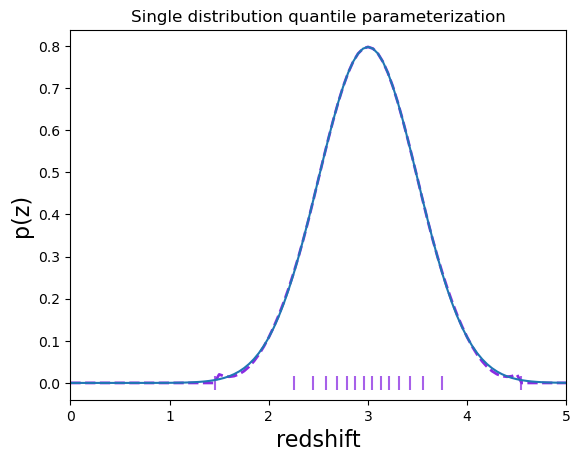

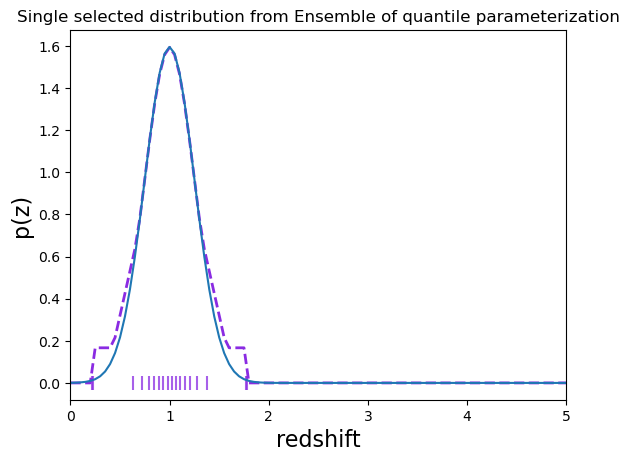

In [10]:
# Show basic plotting
_, ax1 = qp.plotting.plot_native(quant_dist_single_norm, xlim=STD_X_LIM)
qp.plotting.plot_native(single_norm, axes=ax1)
ax1.set_title('Single distribution quantile parameterization')

plot_index = 0
_, ax2 = qp.plotting.plot_native(quant_dist_many_norm[plot_index], xlim=STD_X_LIM)
qp.plotting.plot_native(many_norm[plot_index], axes=ax2)
ax2.set_title('Single selected distribution from Ensemble of quantile parameterization')

## Examination of different reconstruction algorithms for various types of distributions

### Simple Gaussian

Text(0.5, 1.0, 'Original simple Gaussian distribution')

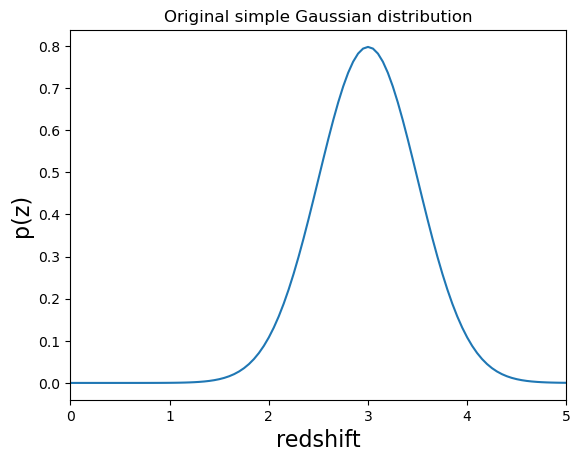

In [11]:
# Same as the single_norm Ensemble created at the beginning of the notebook.
single_norm = qp.Ensemble(qp.stats.norm, data=dict(loc=3, scale=0.5))
fig, ax = qp.plotting.plot_native(single_norm, xlim=STD_X_LIM)
ax.set_title('Original simple Gaussian distribution')

In [12]:
# Define the quantiles, extract the locations from the original distribution
single_norm_quantiles = np.linspace(0.001, 0.999, 16)
single_norm_locations = single_norm.ppf(single_norm_quantiles)

# Create a quantile parameterization ensemble
quant_dist_single_norm = qp.quant(quants=single_norm_quantiles, locs=single_norm_locations)

Text(0.5, 1.0, 'dual_spline_average')

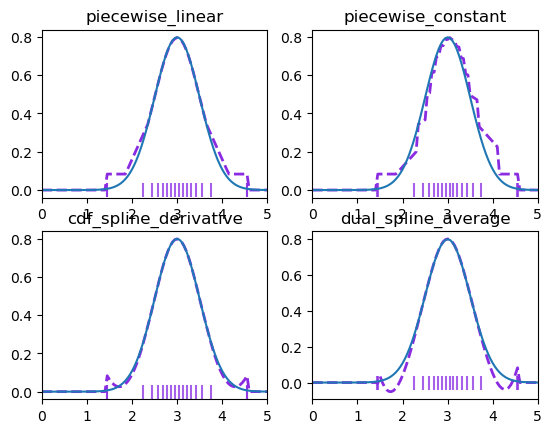

In [13]:
fig, ax = plt.subplots(2,2)
plt.setp(ax, xlim=STD_X_LIM)

quant_dist_single_norm.dist.pdf_constructor_name = 'piecewise_linear' # Will emit a logger warning that this constructor is already selected
qp.plotting.plot_native(quant_dist_single_norm, axes=ax[0,0])
qp.plotting.plot_native(single_norm, axes=ax[0,0])


quant_dist_single_norm.dist.pdf_constructor_name = 'piecewise_constant'
qp.plotting.plot_native(quant_dist_single_norm, axes=ax[0,1])
qp.plotting.plot_native(single_norm, axes=ax[0,1])


quant_dist_single_norm.dist.pdf_constructor_name = 'cdf_spline_derivative'
qp.plotting.plot_native(quant_dist_single_norm, axes=ax[1,0])
qp.plotting.plot_native(single_norm, axes=ax[1,0])


quant_dist_single_norm.dist.pdf_constructor_name = 'dual_spline_average'
qp.plotting.plot_native(quant_dist_single_norm, axes=ax[1,1])
qp.plotting.plot_native(single_norm, axes=ax[1,1])

ax[0,0].set_title('piecewise_linear')
ax[0,1].set_title('piecewise_constant')
ax[1,0].set_title('cdf_spline_derivative')
ax[1,1].set_title('dual_spline_average')

### Simple Rayleigh

/home/jscora/software/anaconda3/envs/qp/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:8778: RuntimeWarning: divide by zero encountered in log
  return np.log(r) - 0.5 * r * r


Text(0.5, 1.0, 'Original simple Rayleigh distribution')

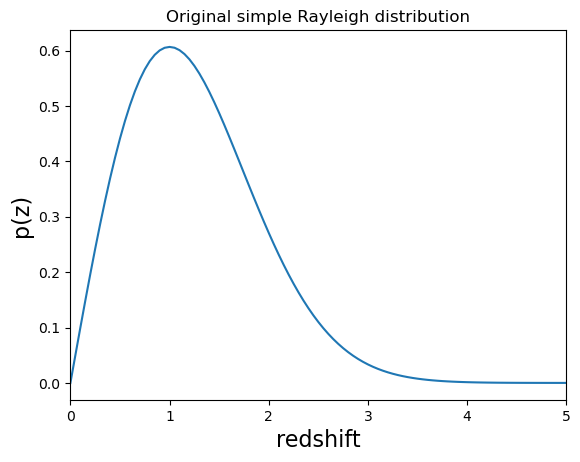

In [14]:
# Same as the single_norm Ensemble created at the beginning of the notebook.
single_rayleigh = qp.Ensemble(qp.stats.rayleigh, data=dict(loc=0, scale=1))
fig, ax = qp.plotting.plot_native(single_rayleigh, xlim=STD_X_LIM)
ax.set_title('Original simple Rayleigh distribution')

In [15]:
# Define the quantiles, extract the locations from the original distribution
single_rayleigh_quantiles = np.linspace(0.001, 0.999, 16)
single_rayleigh_locations = single_rayleigh.ppf(single_rayleigh_quantiles)

# Create a quantile parameterization ensemble
quant_dist_single_rayleigh = qp.quant(quants=single_rayleigh_quantiles, locs=single_rayleigh_locations)

Text(0.5, 1.0, 'dual_spline_average')

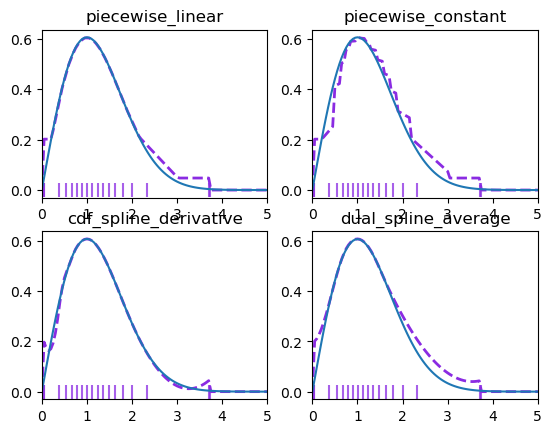

In [16]:
fig, ax = plt.subplots(2,2)
plt.setp(ax, xlim=STD_X_LIM)

quant_dist_single_rayleigh.dist.pdf_constructor_name = 'piecewise_linear' # Will emit a logger warning that this constructor is already selected
qp.plotting.plot_native(quant_dist_single_rayleigh, axes=ax[0,0])
qp.plotting.plot_native(single_rayleigh, axes=ax[0,0])


quant_dist_single_rayleigh.dist.pdf_constructor_name = 'piecewise_constant'
qp.plotting.plot_native(quant_dist_single_rayleigh, axes=ax[0,1])
qp.plotting.plot_native(single_rayleigh, axes=ax[0,1])


quant_dist_single_rayleigh.dist.pdf_constructor_name = 'cdf_spline_derivative'
qp.plotting.plot_native(quant_dist_single_rayleigh, axes=ax[1,0])
qp.plotting.plot_native(single_rayleigh, axes=ax[1,0])


quant_dist_single_rayleigh.dist.pdf_constructor_name = 'dual_spline_average'
qp.plotting.plot_native(quant_dist_single_rayleigh, axes=ax[1,1])
qp.plotting.plot_native(single_rayleigh, axes=ax[1,1])

ax[0,0].set_title('piecewise_linear')
ax[0,1].set_title('piecewise_constant')
ax[1,0].set_title('cdf_spline_derivative')
ax[1,1].set_title('dual_spline_average')

### Merged Gaussian distributions

Text(0.5, 1.0, 'Original merged Gaussian distribution')

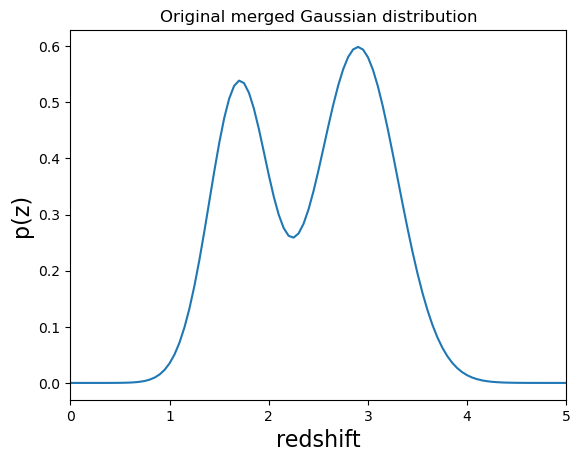

In [17]:
# Create a multi-modal distribution where two Gaussian distributions are merged
mu =  np.array([1.7, 2.9])
sig = np.array([0.3, 0.4])
wt =  np.array([0.4, 0.6])

merged_norms = qp.Ensemble(qp.mixmod, data=dict(means=mu, stds=sig, weights=wt))
fig, ax = qp.plotting.plot_native(merged_norms, xlim=STD_X_LIM)
ax.set_title('Original merged Gaussian distribution')

In [18]:
# Define the quantiles, extract the locations from the original distribution
merged_norm_quantiles = np.linspace(0.001, 0.999, 30)
merged_norm_locations = merged_norms.ppf(merged_norm_quantiles)

# Create a quantile parameterization Ensemble
quant_dist_merged_norm = qp.quant(quants=merged_norm_quantiles, locs=merged_norm_locations)

The following plots show how each of the different pdf reconstruction algorithms perform in the case of a merged distribution.

Text(0.5, 1.0, 'dual_spline_average')

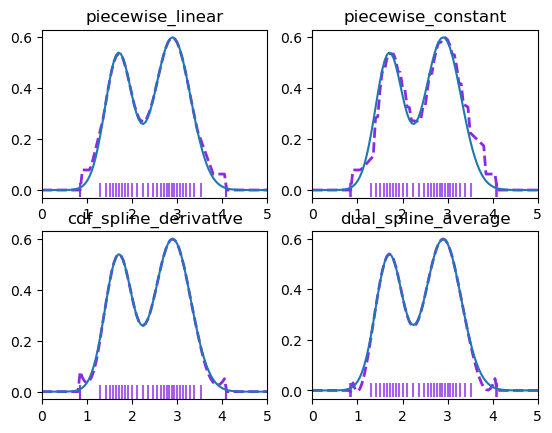

In [19]:
fig, ax = plt.subplots(2,2)
plt.setp(ax, xlim=STD_X_LIM)

quant_dist_merged_norm.dist.pdf_constructor_name = 'piecewise_linear' # Will emit a logger warning that this constructor is already selected
qp.plotting.plot_native(quant_dist_merged_norm, axes=ax[0,0])
qp.plotting.plot_native(merged_norms, axes=ax[0,0])


quant_dist_merged_norm.dist.pdf_constructor_name = 'piecewise_constant'
qp.plotting.plot_native(quant_dist_merged_norm, axes=ax[0,1])
qp.plotting.plot_native(merged_norms, axes=ax[0,1])


quant_dist_merged_norm.dist.pdf_constructor_name = 'cdf_spline_derivative'
qp.plotting.plot_native(quant_dist_merged_norm, axes=ax[1,0])
qp.plotting.plot_native(merged_norms, axes=ax[1,0])


quant_dist_merged_norm.dist.pdf_constructor_name = 'dual_spline_average'
qp.plotting.plot_native(quant_dist_merged_norm, axes=ax[1,1])
qp.plotting.plot_native(merged_norms, axes=ax[1,1])

ax[0,0].set_title('piecewise_linear')
ax[0,1].set_title('piecewise_constant')
ax[1,0].set_title('cdf_spline_derivative')
ax[1,1].set_title('dual_spline_average')

### Distinct Gaussian distributions

Text(0.5, 1.0, 'Original distinct Gaussian distribution')

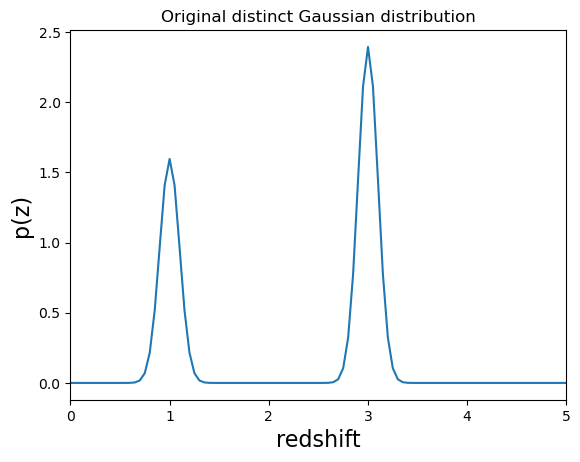

In [20]:
# Create a multi-modal distribution with two distinct Gaussian distributions
mu =  np.array([1, 3])
sig = np.array([0.1, 0.1])
wt =  np.array([0.4, 0.6])

distinct_norms = qp.Ensemble(qp.mixmod, data=dict(means=mu, stds=sig, weights=wt))
fig, ax = qp.plotting.plot_native(distinct_norms, xlim=STD_X_LIM)
ax.set_title('Original distinct Gaussian distribution')

In [21]:
# Define the quantiles, extract the locations from the original distribution
distinct_norm_quantiles = np.linspace(0.001, 0.999, 30)
distinct_norm_locations = distinct_norms.ppf(distinct_norm_quantiles)

# Create a quantile parameterization Ensemble
quant_dist_distinct_norm = qp.quant(quants=distinct_norm_quantiles, locs=distinct_norm_locations)

Text(0.5, 1.0, 'dual_spline_average')

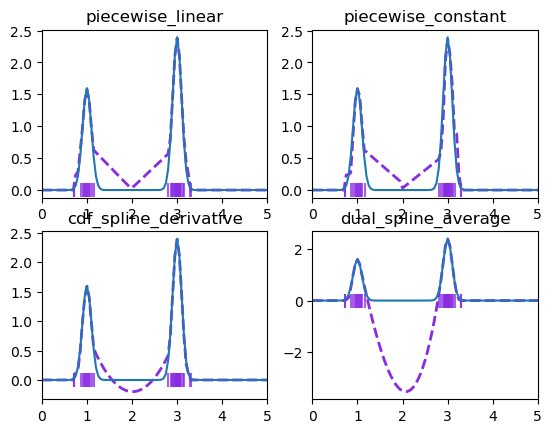

In [22]:
fig, ax = plt.subplots(2,2)
plt.setp(ax, xlim=STD_X_LIM)

quant_dist_distinct_norm.dist.pdf_constructor_name = 'piecewise_linear' # Will emit a logger warning that this constructor is already selected
qp.plotting.plot_native(quant_dist_distinct_norm, axes=ax[0,0])
qp.plotting.plot_native(distinct_norms, axes=ax[0,0])

quant_dist_distinct_norm.dist.pdf_constructor_name = 'piecewise_constant'
qp.plotting.plot_native(quant_dist_distinct_norm, axes=ax[0,1])
qp.plotting.plot_native(distinct_norms, axes=ax[0,1])

quant_dist_distinct_norm.dist.pdf_constructor_name = 'cdf_spline_derivative'
qp.plotting.plot_native(quant_dist_distinct_norm, axes=ax[1,0])
qp.plotting.plot_native(distinct_norms, axes=ax[1,0])

quant_dist_distinct_norm.dist.pdf_constructor_name = 'dual_spline_average'
qp.plotting.plot_native(quant_dist_distinct_norm, axes=ax[1,1])
qp.plotting.plot_native(distinct_norms, axes=ax[1,1])

ax[0,0].set_title('piecewise_linear')
ax[0,1].set_title('piecewise_constant')
ax[1,0].set_title('cdf_spline_derivative')
ax[1,1].set_title('dual_spline_average')

## PDF Reconstruction algorithm `debug` method
Each PDF reconstruction class has a `debug` method which will generally return a tuple of the primary and intermediate calculations used to reconstruct the original PDF. 

Text(0.5, 1.0, 'Original merged Gaussian distribution')

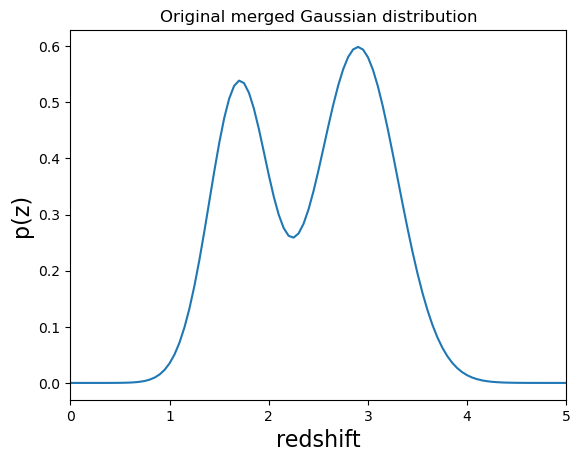

In [23]:
# Create a multi-modal distribution where two Gaussian distributions are merged - same as the section above, "Merged Gaussian distributions".
mu =  np.array([1.7, 2.9])
sig = np.array([0.3, 0.4])
wt =  np.array([0.4, 0.6])

merged_norms = qp.Ensemble(qp.mixmod, data=dict(means=mu, stds=sig, weights=wt))
fig, ax = qp.plotting.plot_native(merged_norms, xlim=STD_X_LIM)
ax.set_title('Original merged Gaussian distribution')



In the following diagram, we've used the `debug` method to retrieve the intermediate calculations from the dual spline average PDF reconstructor. 

The plot shows the original PDF in blue, and the reconstructed points as orange stars. Shown as a green dotted line, the trapezoid reconstruction of the original PDF uses an iterative approach to calculate the unknown corner of the trapezoid approximation of the curve.

Noting that the trapezoid reconstruction oscillates around the true PDF at every point leads to fitting two splines (the purple and red dashed lines) on the even and odd points of the trapezoid reconstruction. The final output is the average of the two splines at a given x location.

(0.0, 5.0)

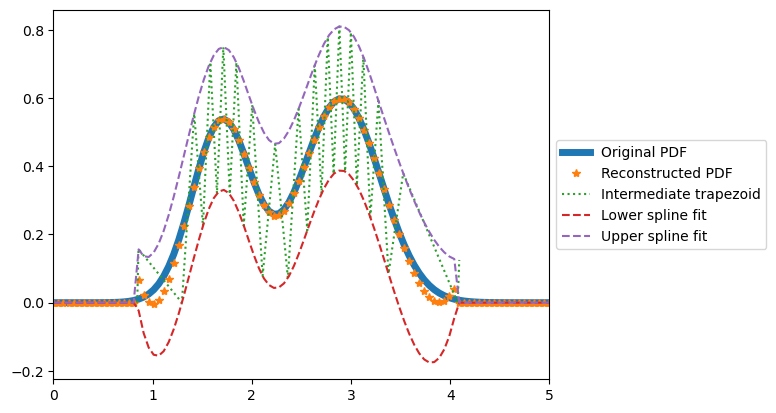

In [24]:
# Define the quantiles, extract the locations from the original distribution
merged_norm_quantiles = np.linspace(0.001, 0.999, 30)
merged_norm_locations = merged_norms.ppf(merged_norm_quantiles)

# Create a quantile parameterization Ensemble
quant_dist_merged_norm = qp.quant(quants=merged_norm_quantiles, locs=merged_norm_locations)

# Set the PDF reconstruction algorithm to use
quant_dist_merged_norm.dist.pdf_constructor_name = 'dual_spline_average'

# Retrieve the reconstructed PDF manually by passing in a "grid".
x_values = np.linspace(0,5,100)
original_y_values = merged_norms.pdf(x_values)
y_values = quant_dist_merged_norm.pdf(x_values)

# Retrieve the primary data and intermediate calculations for the algorithm.
# Here `quantiles`` and `locations`` are the primary data. `p_of_zs`, `y1`, and `y2` are intermediate results.
# `p_of_zs` represents the intermediate stepwise calculation of area under the PDF based on the the difference between adjacent quantiles
# `y1` and `y2` are splines fit to the odd and even `p_of_zs` values (respectively)
quantiles, locations, p_of_zs, y1, y2 = quant_dist_merged_norm.dist.pdf_constructor.debug()

plt.plot(x_values, original_y_values, linewidth=5, label='Original PDF')
plt.plot(x_values, y_values, marker='*', linestyle='none', label='Reconstructed PDF')
plt.plot(np.squeeze(locations), np.squeeze(p_of_zs), linestyle=':', label='Intermediate trapezoid')
plt.plot(x_values, np.squeeze(y1), linestyle='--', label='Lower spline fit')
plt.plot(x_values, np.squeeze(y2), linestyle='--', label='Upper spline fit')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(0,5)


## Reference material
The following code was extracted from the original implementation of `qp` [github link](https://github.com/aimalz/qp). It was originally written using Python 2 and was updated to run on Python 3, and is kept here as a reference.

Note: The PDF constructor `cdf_spline_derivative` is a reproduction of this original code.

In [25]:
#The following methods were extracted from https://github.com/aimalz/qp/blob/master/qp/pdf.py and modified only so that they would run within this notebook. The math has not changed.
from scipy.interpolate import interp1d, InterpolatedUnivariateSpline
import sys

epsilon = sys.float_info.epsilon
infty = sys.float_info.max * epsilon

def sandwich(in_arr, ends):
    """
    Adds given values to the ends of a 1D array

    Parameters
    ----------
    in_arr: numpy.ndarray, float
        original array
    ends: numpy.ndarray or tuple or list, float or numpy.ndarray, float
        values to be added to the beginning and end

    Returns
    -------
    out_arr: numpy.ndarray, float
        array with front and back concatenations
    """
    if type(ends[0]) == np.ndarray:
        prepend = len(ends[0])
    else:
        prepend = 1
    if type(ends[-1]) == np.ndarray:
        append = -1 * len(ends[-1])
    else:
        append = -1
    out_arr = np.zeros(prepend + len(in_arr) - append)
    out_arr[:prepend] = ends[0]
    out_arr[prepend:append] = in_arr
    out_arr[append:] = ends[-1]
    return out_arr

def evaluate_histogram(in_data, threshold=epsilon):
    """
    Produces PDF values given samples

    Parameters
    ----------
    in_data: None or tuple, numpy.ndarray, float
        tuple of (n+1) bin endpoints x and (n) CDF y between endpoints
    threshold: float, optional

    vb: boolean, optional
        be careful and print progress to stdout?

    Returns
    -------
    out_data: tuple, float
        sorted samples x and corresponding PDF values y
    """
    # x = locs (or in our case redshift values)
    # y = first derivatives of delta_quant/delta_loc or in our case p(z)
    (x, y) = in_data
    dx = threshold
    xs = np.zeros(2 * len(y))
    ys = xs
    # ! xs defines the bin edges.
    # ! This is creating the bin edges. xs[0] and xs[1] are the edges of the first bin. 
    # ! xs[2] = xs[1]+epsilon becomes the beginning of the second bin, etc.
    # ! Then we "repeat" the y values so that you end up with histogram steps.
    xs[::2] = x[:-1] + dx
    xs[1::2] = x[1:] - dx
    ys = np.repeat(y, 2)
    xs = sandwich(xs, (x[0] - dx, x[-1] + dx))
    ys = sandwich(ys, (threshold, threshold))
    out_data = (xs, ys)
    return out_data

def evaluate_quantiles(in_data, threshold=epsilon):
    """
    Estimates PDF values given quantile information

    Parameters
    ----------
    in_data: tuple, numpy.ndarray, float
        tuple of CDF values iy and values x at which those CDFs are achieved
    threshold: float, optional
        optional minimum threshold for CDF difference
    vb: boolean, optional
        be careful and print progress to stdout?

    Returns
    -------
    out_data: tuple, numpy.ndarray, float
        values xs and corresponding PDF values ys
    """

    # iy = quants
    # x = locs
    (iy, x) = in_data

    # This is the same as np.diff(x)
    dx = x[1:] - x[:-1]
    
    # This is the same as np.diff(iy)
    diy = iy[1:] - iy[:-1]

    # this is the numerical first derivative i.e. p(z)
    y = diy / dx

    # evaluate_histogram(locs, first_derivs)
    (xs, ys) = evaluate_histogram((x, y), threshold=threshold)
    out_data = (xs[1:-1], ys[1:-1])
    return out_data

def normalize_quantiles(in_data, threshold=epsilon):
    """
    Evaluates PDF from quantiles including endpoints from linear extrapolation

    Parameters
    ----------
    in_data: tuple, numpy.ndarray, float
        tuple of CDF values iy corresponding to quantiles and the points x at
        which those CDF values are achieved
    threshold: float, optional
        optional minimum threshold for PDF
    vb: boolean, optional
        be careful and print progress to stdout?

    Returns
    -------
    out_data: tuple, ndarray, float
        tuple of values x at which CDF is achieved, including extrema, and
        normalized PDF values y at x
    """

    # iy = quants
    # x = locs
    (iy, x) = in_data
    (xs, ys) = evaluate_quantiles((iy, x))
    # xs = xs[1:-1]
    # ys = ys[1:-1]

    # ! I believe that this is just using the slope to add end points to the list of x values.
    x_min = xs[0] - 2 * iy[0] / ys[0]
    x_max = xs[-1] + 2 * (1. - iy[-1]) / ys[-1]
    xs = sandwich(xs, (x_min, x_max))
    ys = sandwich(ys, (threshold, threshold))
    out_data = (xs, ys)
    return out_data

def normalize_gridded(in_data, thresholds=(epsilon, infty)):
    """
    Removes extreme values from gridded parametrizations

    Parameters
    ----------
    in_data: None or tuple, numpy.ndarray, float
        tuple of points x at which function is evaluated and the PDF y at those
        points
    thresholds: tuple, float, optional
        optional min/max thresholds for normalization

    Returns
    -------
    out_data: tuple, numpy.ndarray, float
        tuple of input x and normalized y
    """
    if in_data is None:
        return in_data
    (x, y) = in_data
    y[y < thresholds[0]] = thresholds[0]
    y[y > thresholds[-1]] = thresholds[-1]
    out_data = (x, y)
    return out_data

def original_qp_interpolation(quants, locs):

    # ! These are the variable name substitutions I've made
    # quants_and_locs = self.quantiles # A 2d array of quantiles and locations
    # scheme = scheme # using 'linear', used to determine the type of interpolation with interp1d

    scheme = 'linear'
    quants_and_locs = np.array([quants, locs])

    if type(scheme) != int:
        order = min(5, len(quants_and_locs[0]))
    else:
        order = scheme

    # ! Looks like only min(x) and max(x) are used after this in this function, but x,y are used in `quantile_interpolator` later.
    (x, y) = normalize_quantiles(quants_and_locs)
    z = np.insert(quants_and_locs[1], 0, min(x))
    z = np.append(z, max(x))
    q = np.insert(quants_and_locs[0], 0, 0.)
    q = np.append(q, 1.)

    [x_crit_lo, x_crit_hi] = [quants_and_locs[1][0], quants_and_locs[1][-1]]
    [y_crit_lo, y_crit_hi] = [-1., -1.]

    try:
        while (order>0) and ((y_crit_lo <= 0.) or (y_crit_hi <= 0.)):
            inside = InterpolatedUnivariateSpline(z, q, k=order, ext=1).derivative()
            [y_crit_lo, y_crit_hi] = inside([x_crit_lo, x_crit_hi])
            order -= 1
        assert((y_crit_lo > 0.) and (y_crit_hi > 0.))
    except AssertionError:
        print('ERROR: spline tangents '+str((y_crit_lo, y_crit_hi))+'<0')
        if type(scheme) == str:
            this_scheme = scheme
        else:
            this_scheme = 'linear'
        inside_int = interp1d(z, q, kind=this_scheme, bounds_error=False, fill_value=epsilon)
        derivative = (q[1:] - q[:-1]) / (z[1:] - z[:-1])
        derivative = np.insert(derivative, 0, epsilon)
        derivative = np.append(derivative, epsilon)
        def inside(xf):
            nx = len(xf)
            yf = np.ones(nx) * epsilon
            for n in range(nx):
                i = bisect.bisect_left(z, xf[n])
                yf[n] = derivative[i]
            return(yf)
        [y_crit_lo, y_crit_hi] = inside([x_crit_lo, x_crit_hi])
        assert((y_crit_lo > 0.) and (y_crit_hi > 0.))
    return quants_and_locs, x_crit_lo, x_crit_hi, y_crit_lo, y_crit_hi, x, y, z, inside

def quantile_interpolator(quants_and_locs, x_crit_lo, x_crit_hi, y_crit_lo, y_crit_hi, x, y, z, inside, xf):
    yf = np.ones(np.shape(xf)) * epsilon
    in_inds = ((xf >= quants_and_locs[1][0]) & (xf <= quants_and_locs[1][-1])).nonzero()[0]
    lo_inds = ((xf < quants_and_locs[1][0]) & (xf >= z[0])).nonzero()[0]
    hi_inds = ((xf > quants_and_locs[1][-1]) & (xf <= z[-1])).nonzero()[0]

    try:
        yf[in_inds] = inside(xf[in_inds])
        assert(np.all(yf >= epsilon))

    except AssertionError:
        print('ERROR: spline interpolation failed with '+str((xf[in_inds], yf[in_inds])))
        try:
            alternate = interp1d(x, y, kind='linear', bounds_error=False, fill_value=epsilon)
            yf[in_inds] = alternate(xf[in_inds])
            assert(np.all(yf >= epsilon))

        except AssertionError:
            print('ERROR: linear interpolation failed for the '+using+' parametrization with '+str((xf[in_inds], yf[in_inds])))
            backup = qp.utils.make_kludge_interpolator((x, y), threshold=epsilon)
            yf[in_inds] = backup(xf[in_inds])

            assert(np.all(yf >= epsilon))

    try:
        tan_lo = y_crit_lo / (x_crit_lo - z[0])
        yf[lo_inds] = tan_lo * (xf[lo_inds] - z[0])# yf[in_inds[0]] / (xf[in_inds[0]] - z[0])
        assert(np.all(yf >= epsilon))
    except AssertionError:
        print('ERROR: linear extrapolation below failed with '+str((xf[lo_inds], yf[lo_inds]))+' via '+str((tan_lo, x_crit_lo, z[0])))

    try:
        tan_hi = y_crit_hi / (z[-1] - x_crit_hi)
        yf[hi_inds] = tan_hi * (z[-1] - xf[hi_inds])# yf[in_inds[-1]] * (xf[hi_inds] - z[-1]) / (xf[in_inds[-1]] - z[-1])
        assert(np.all(yf >= epsilon))
    except AssertionError:
        print('ERROR: linear extrapolation above failed with '+str((xf[hi_inds], yf[hi_inds]))+' via '+str((tan_hi, z[-1], x_crit_hi)))

    return(yf)

def approximate(quants, locs, grid=None):
        """
        Interpolates the parametrization to get an approximation to the density.

        Parameters
        ----------
        points: ndarray
            the value(s) at which to evaluate the interpolated function
        

        Returns
        -------
        points: ndarray, float
            the input grid upon which to interpolate
        interpolated: ndarray, float
            the interpolated points.

        Notes
        -----
        Extrapolation is via the `scheme` while values are positive;
        otherwise, extrapolation returns 0.

        Example:
            x, y = p.approximate(np.linspace(-1., 1., 100))
        """
        if grid is None:
            grid = locs

        quants_and_locs, x_crit_lo, x_crit_hi, y_crit_lo, y_crit_hi, x, y, z, inside = original_qp_interpolation(quants, locs)

        interpolated = quantile_interpolator(quants_and_locs, x_crit_lo, x_crit_hi, y_crit_lo, y_crit_hi, x, y, z, inside, grid)
        
        interpolated = normalize_gridded((grid, interpolated))

        return interpolated

Example of a single distribution made up of two merged gaussian distributions

In [26]:
# Experimenting with well separated multi-modal Gaussians.
mu = np.array([1.7, 2.9])
sig = np.array([0.3,0.4])
wt = np.array([0.4, 0.6])

merged_norms = qp.Ensemble(qp.mixmod, data=dict(means=mu, stds=sig, weights=wt))

new_quants = np.linspace(0.001, 0.999, 11)
new_locs = merged_norms.ppf(new_quants)

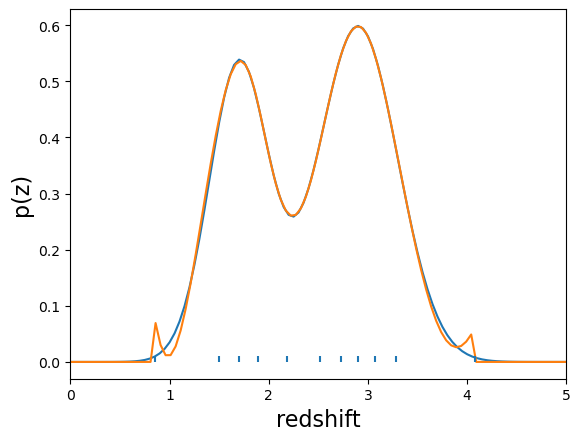

In [27]:
# ! When this runs it uses 4th degree spline interpolator as `inside` in quantile_interpolator
test = approximate(new_quants, new_locs, np.linspace(0,5,100))
fig, axes = qp.plotting.plot_native(merged_norms, xlim=(0, 5))
axes.plot(test[0], test[1])
axes.vlines(new_locs, 0, 0.01)

Example of a single distribution made up of two well separated gaussian distributions

In [28]:
# Experimenting with well separated multi-modal Gaussians.
mu = np.array([0.5,2.9])
sig = np.array([0.05,0.04])
wt = np.array([.4,.6])

distinct_norms = qp.Ensemble(qp.mixmod, data=dict(means=mu, stds=sig, weights=wt))

new_quants = np.linspace(0.001, 0.999, 15)
new_locs = distinct_norms.ppf(new_quants)


When running `approximate` here, the spline fit fails, and we fall back to a linear interpolation over the numerical derivative.

ERROR: spline interpolation failed with (array([0.4040404 , 0.45454545, 0.50505051, 0.55555556, 0.60606061,
       0.65656566, 0.70707071, 0.75757576, 0.80808081, 0.85858586,
       0.90909091, 0.95959596, 1.01010101, 1.06060606, 1.11111111,
       1.16161616, 1.21212121, 1.26262626, 1.31313131, 1.36363636,
       1.41414141, 1.46464646, 1.51515152, 1.56565657, 1.61616162,
       1.66666667, 1.71717172, 1.76767677, 1.81818182, 1.86868687,
       1.91919192, 1.96969697, 2.02020202, 2.07070707, 2.12121212,
       2.17171717, 2.22222222, 2.27272727, 2.32323232, 2.37373737,
       2.42424242, 2.47474747, 2.52525253, 2.57575758, 2.62626263,
       2.67676768, 2.72727273, 2.77777778, 2.82828283, 2.87878788,
       2.92929293, 2.97979798]), array([  0.45237585,   2.09493306,   3.15589098,   1.75145882,
         0.32953306,  -0.56511098,  -1.005467  ,  -1.06081189,
        -0.79653633,  -0.27414479,   0.4487445 ,   1.31839951,
         2.28497444,   3.30250969,   4.32893191,   5.32605393,
    

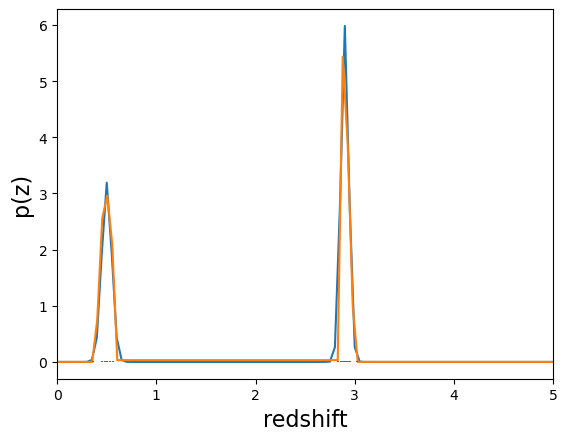

In [29]:
# ! When this runs it uses linear interpolation of x,y in the first `except` clause in quantile_interpolator
test = approximate(new_quants, new_locs, np.linspace(0,5,100))
fig, axes = qp.plotting.plot_native(distinct_norms, xlim=(0, 5))
axes.plot(test[0], test[1])
axes.vlines(new_locs, 0, 0.01)